<a href="https://colab.research.google.com/github/divyadixit/GL_Aug_Hackathon_OpenDataSF/blob/master/opensfdata_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context
Salary range is the range of pay established by employers to pay to employees performing a particular job or function. Salary range generally has a minimum pay rate,a maximum pay rate, and a series of mid-range opportunities for pay increases.The salary range is determined by market pay rates, organization, department, union,type and domain of jobs, established through market pay studies, for people doing similar work in similar industries in the same region of the country.Pay rates and salary ranges are also set up by individual employers and recognize the level of education, knowledge, skill and experience needed to perform each job.

#About Dataset
Its a database of the salary and benefits paid to City employees since fiscal year 2013.This data is summarized and presented on the Employee Compensation report hostedat ​http://openbook.sfgov.org​.

#### https://datasf.org/opendata/
#### https://data.sfgov.org/browse?category=City+Management+and+Ethics


In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/My Drive/hackathon/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/hackathon/test.csv')

In [4]:
#df1 = pd.read_csv('train.csv')
#df2 = pd.read_csv('test.csv')

In [5]:
df1.head()
df2.head()

,Sno,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,Human Services,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,Appraisal & Taxation,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,Human Services,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


,Sno,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2454,Clinical Pharmacist,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,Human Services,2930,Psychiatric Social Worker,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


### Column information

Year - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012. <br>


Fiscal (July through June) or Calendar (January through December) <br>
The year_type column is of the text datatype.


In [6]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Sno                      149087 non-null  int64  
 1   Year Type                149087 non-null  object 
 2   Year                     149087 non-null  int64  
 3   Organization Group Code  149087 non-null  int64  
 4   Organization Group       149087 non-null  object 
 5   Department Code          149087 non-null  object 
 6   Department               149087 non-null  object 
 7   Union Code               149087 non-null  int64  
 8   Union                    149087 non-null  object 
 9   Job Family Code          149087 non-null  object 
 10  Job Family               149087 non-null  object 
 11  Job Code                 149087 non-null  object 
 12  Job                      149087 non-null  object 
 13  Employee Identifier      149087 non-null  int64  
 14  Over

Removing spaces from column names in order to make use of dot notation

In [7]:
df1.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df1.columns]
df2.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df2.columns]

Checking for any duplicates

In [8]:
df1.duplicated().sum(), df2.Sno.duplicated().sum()
df1.duplicated().sum(), df2.Sno.duplicated().sum()

(0, 0)

(0, 0)

This dataset has a single Year_type value which means there is no variance and hence can be dropped later

In [9]:
df1.Year_Type.value_counts(), df2.Year_Type.value_counts()

(Fiscal    149087
 Name: Year_Type, dtype: int64, Fiscal    63895
 Name: Year_Type, dtype: int64)

Coverting object variables to categorical type. These will also be the ones that will be potentially label-encoded or one-hot encoded

In [10]:
#df1.Year = df1.Year.astype('int64')
df1.Organization_Group_Code = df1.Organization_Group_Code.astype('category')
df1.Department_Code = df1.Department_Code.astype('category')
df1.Union_Code = df1.Union_Code.astype('category')
df1.Job_Family_Code = df1.Job_Family_Code.astype('category')
df1.Job_Code = df1.Job_Code.astype('category')
df1.Class = df1.Class.astype('category')

#df2.Year = df2.Year.astype('int64')
df2.Organization_Group_Code = df2.Organization_Group_Code.astype('category')
df2.Department_Code = df2.Department_Code.astype('category')
df2.Union_Code = df2.Union_Code.astype('category')
df2.Job_Family_Code = df2.Job_Family_Code.astype('category')
df2.Job_Code = df2.Job_Code.astype('category')
#df2.Class = df2.Class.astype('category')

In [11]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Sno                      149087 non-null  int64   
 1   Year_Type                149087 non-null  object  
 2   Year                     149087 non-null  int64   
 3   Organization_Group_Code  149087 non-null  category
 4   Organization_Group       149087 non-null  object  
 5   Department_Code          149087 non-null  category
 6   Department               149087 non-null  object  
 7   Union_Code               149087 non-null  category
 8   Union                    149087 non-null  object  
 9   Job_Family_Code          149087 non-null  category
 10  Job_Family               149087 non-null  object  
 11  Job_Code                 149087 non-null  category
 12  Job                      149087 non-null  object  
 13  Employee_Identifier      149087 non-null  in

From data dictionary and initial analysis it is pretty clear that <Group> and <Group Code> are columns that are relaying the same inforamtion and hence one from eact set can be removed.    
These include Organization Group, Department, Union, Job Family and Job

In [12]:
df1.Class.value_counts()

3    50811
2    49604
1    48672
Name: Class, dtype: int64

The classes look closely balanced. 

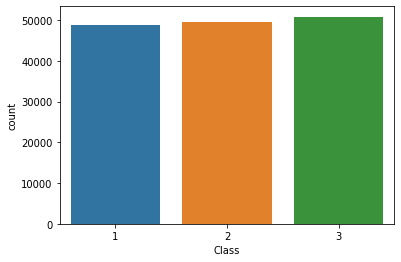

In [13]:
sns.countplot(df1.Class)

2    47146
4    32193
1    28588
3    13775
5    13644
6    13555
7      186
Name: Organization_Group_Code, dtype: int64


 2    20089
4    13915
1    12166
5     5946
6     5880
3     5819
7       80
Name: Organization_Group_Code, dtype: int64


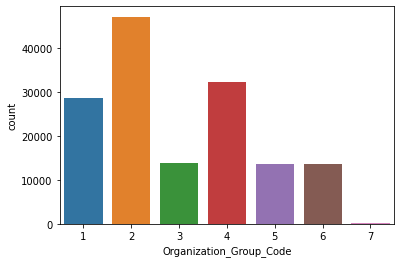

In [14]:
df1.Organization_Group_Code.value_counts()
print('\n', df2.Organization_Group_Code.value_counts())
sns.countplot(df1.Organization_Group_Code)

9163    9092
P103    5321
2320    4653
Q004    2936
H002    2931
        ... 
7233       1
7240       1
351C       1
8186       1
8213       1
Name: Job_Code, Length: 1141, dtype: int64


 9163    3997
P103    2342
2320    1968
H002    1318
9910    1303
        ... 
155C       1
4140       1
8568       1
2565       1
9358       1
Name: Job_Code, Length: 1068, dtype: int64


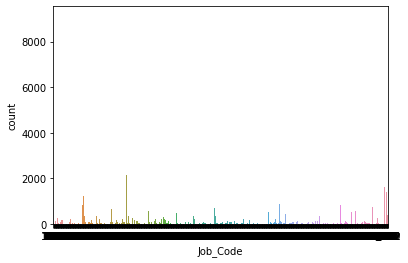

In [15]:
df1.Job_Code.value_counts()
print('\n', df2.Job_Code.value_counts())
sns.countplot(df1.Job_Code)

790    42544
21     19294
791    11187
911     9814
253     9092
       ...  
969        8
220        7
353        5
302        3
604        2
Name: Union_Code, Length: 69, dtype: int64


 790    18267
21      8079
791     4853
911     4089
253     3997
       ...  
353        4
220        4
604        3
302        2
990        2
Name: Union_Code, Length: 68, dtype: int64


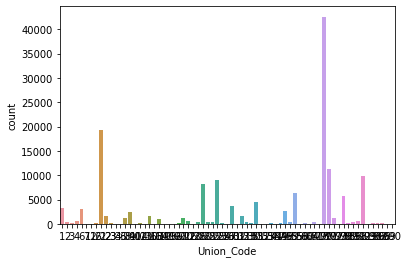

In [16]:
df1.Union_Code.value_counts()
print('\n', df2.Union_Code.value_counts())
sns.countplot(df1.Union_Code)

56


 56


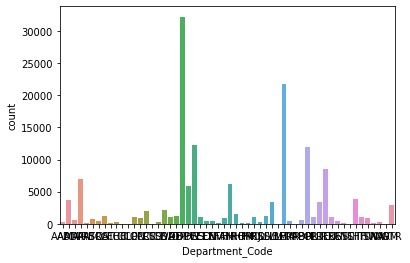

In [17]:
df1.Department_Code.value_counts().count()
print('\n', df2.Department_Code.value_counts().count())
sns.countplot(df1.Department_Code)

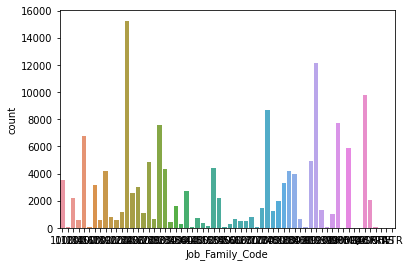

In [18]:
sns.countplot(df1.Job_Family_Code)

In [19]:
#s1 = df1.Job_Family_Code.value_counts(ascending=True)
#s2 = df2.Job_Family_Code.value_counts(ascending=True)

#s1.to_csv('s1.csv')
#s2.to_csv('s2.csv')

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,149087.0,106616.273807,61550.046783,0.00,53204.500,106623.00,159919.500,213201.00
Year,149087.0,2015.072018,1.410452,2013.00,2014.000,2015.00,2016.000,2017.00
Employee_Identifier,149087.0,28508.984465,16460.652590,1.00,14244.000,28520.00,42804.500,56987.00
Overtime,149087.0,4511.488439,11361.792998,-12308.66,0.000,0.00,2872.240,227313.62
Other_Salaries,149087.0,3754.638895,7516.445237,-19131.10,0.000,698.35,4558.190,336726.34
Retirement,149087.0,12632.395320,9657.913757,-28723.19,3228.975,12839.71,19137.745,101306.01
Health_Dental,149087.0,9058.531893,5024.486147,-2946.53,4274.930,12137.40,12828.180,22052.15
Other_Benefits,149087.0,4720.552627,3933.772085,-9857.74,1578.475,4395.51,6943.835,36815.39
Total_Benefits,149087.0,26411.479840,16893.424789,-19814.44,9313.965,30311.56,38510.300,138503.52


Continuous variables have some negative values. Outliers and negative values have not been treated in the first two iterations. 

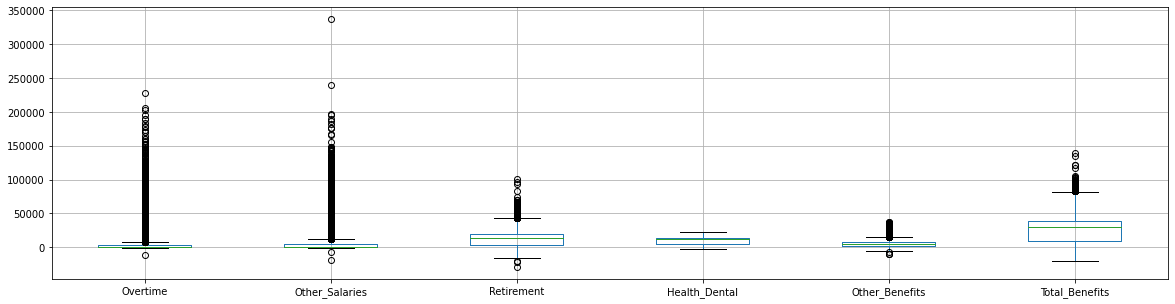

In [24]:
df = df1.drop(columns = ['Sno','Year','Employee_Identifier'], axis=1)
df.boxplot(figsize=(20,5))

In [29]:
# Negative values of Retirement

df[df['Retirement'] < 0]
df[df['Retirement'] <0].shape[0]/df.shape[0]  # % of negative values

,Year_Type,Organization_Group_Code,Organization_Group,Department_Code,Department,Union_Code,Union,Job_Family_Code,Job_Family,Job_Code,Job,Overtime,Other_Salaries,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Class
96,Fiscal,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1000,Information Systems,1054,IS Business Analyst-Principal,0.0,0.00,-375.45,554.26,3.36,182.17,1
1499,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,164.70,-0.01,444.05,28.34,472.38,1
1773,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,0.00,-0.09,0.00,2532.49,2532.40,1
1813,Fiscal,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",1404,Clerk,0.0,2326.57,-40.41,0.00,162.57,122.16,1
2448,Fiscal,1,Public Protection,POL,POL Police,911,Police Officers' Association,Q000,Police Services,Q004,Police Officer 3,0.0,0.00,-9.11,0.00,0.00,-9.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145512,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,113.28,-0.02,0.00,44.73,44.71,1
146283,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,911.39,-16.07,1320.19,1008.65,2312.77,1
147119,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,90.27,-0.01,0.00,905.13,905.12,1
147257,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,250.64,-669.93,514.91,5280.71,5125.69,1


0.0014756484468800098

In [30]:
# Negative values of Health Benefits

df[df['Health_Dental'] < 0]
df[df['Health_Dental'] <0].shape[0]/df.shape[0]  # % of negative values

,Year_Type,Organization_Group_Code,Organization_Group,Department_Code,Department,Union_Code,Union,Job_Family_Code,Job_Family,Job_Code,Job,Overtime,Other_Salaries,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Class
918,Fiscal,6,General Administration & Finance,RET,RET Retirement System,323,Members of Boards and Commissions,900,Management,119,"Commissioner 16700c, No Pay",0.0,0.00,0.00,-199.96,0.00,-199.96,1
3814,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2320,Registered Nurse,0.0,5613.12,0.00,-199.96,433.02,233.06,1
4739,Fiscal,2,"Public Works, Transportation & Commerce",PRT,PRT Port,351,Municipal Executive Association - Miscellaneous,900,Management,941,Manager VI,0.0,24897.51,0.00,-199.96,1135.33,935.37,1
6023,Fiscal,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",1404,Clerk,0.0,0.00,0.00,-199.96,0.00,-199.96,1
7606,Fiscal,4,Community Health,DPH,DPH Public Health,250,"SEIU - Health Workers, Local 1021",2300,Nursing,2302,Nursing Assistant,0.0,9116.02,0.00,-199.96,697.74,497.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137672,Fiscal,4,Community Health,DPH,DPH Public Health,250,"SEIU - Health Workers, Local 1021",2300,Nursing,2302,Nursing Assistant,0.0,8178.73,-232.81,-239.79,526.02,53.42,1
142139,Fiscal,1,Public Protection,POL,POL Police,911,Police Officers' Association,Q000,Police Services,Q004,Police Officer 3,0.0,0.00,182.23,-199.96,14.54,-3.19,1
144154,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,0.0,8733.84,0.00,-199.96,668.15,468.19,1
145482,Fiscal,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,1,Miscellaneous Unrepresented Employees,9900,Public Service Aide,9916,Public Svc Aide-Public Works,0.0,-21.76,0.00,-369.19,-63.51,-432.70,1


0.0006707492940363681

In [31]:
# Negative values of Other Benefits

df[df['Other_Benefits'] < 0]
df[df['Other_Benefits'] <0].shape[0]/df.shape[0]  # % of negative values

,Year_Type,Organization_Group_Code,Organization_Group,Department_Code,Department,Union_Code,Union,Job_Family_Code,Job_Family,Job_Code,Job,Overtime,Other_Salaries,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Class
177,Fiscal,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5302,Traffic Survey Technician,0.0,0.00,0.00,0.00,-20.33,-20.33,1
538,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,56.64,0.00,0.00,-0.02,-0.02,1
644,Fiscal,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,0.0,0.00,0.00,0.00,-11.85,-11.85,1
1091,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,69.91,5282.69,72.11,-0.01,5354.79,1
3085,Fiscal,3,Human Welfare & Neighborhood Development,ENV,ENV Environment,790,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,9920,Publ Svc Aide-Asst To Prof,0.0,0.00,0.00,0.00,-7.14,-7.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147062,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,26.70,0.01,0.00,-0.01,0.00,1
147280,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,201.64,4432.42,504.02,-0.04,4936.40,1
147532,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,201.72,0.04,0.00,-0.01,0.03,1
148046,Fiscal,5,Culture & Recreation,REC,REC Recreation & Park Commsn,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5380,"Stdntdsgntrain1, Arch/Eng/Plng",0.0,0.00,0.00,4886.83,-79.19,4807.64,1


0.0018512680515403758

In [32]:
# Negative values of Other Benefits

df[df['Total_Benefits'] < 0]
df[df['Total_Benefits'] <0].shape[0]/df.shape[0]  # % of negative values

,Year_Type,Organization_Group_Code,Organization_Group,Department_Code,Department,Union_Code,Union,Job_Family_Code,Job_Family,Job_Code,Job,Overtime,Other_Salaries,Retirement,Health_Dental,Other_Benefits,Total_Benefits,Class
177,Fiscal,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,Sub-Professional Engineering,5302,Traffic Survey Technician,0.0,0.00,0.00,0.00,-20.33,-20.33,1
538,Fiscal,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,0.0,56.64,0.00,0.00,-0.02,-0.02,1
644,Fiscal,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,0.0,0.00,0.00,0.00,-11.85,-11.85,1
918,Fiscal,6,General Administration & Finance,RET,RET Retirement System,323,Members of Boards and Commissions,900,Management,119,"Commissioner 16700c, No Pay",0.0,0.00,0.00,-199.96,0.00,-199.96,1
2448,Fiscal,1,Public Protection,POL,POL Police,911,Police Officers' Association,Q000,Police Services,Q004,Police Officer 3,0.0,0.00,-9.11,0.00,0.00,-9.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143502,Fiscal,1,Public Protection,POL,POL Police,911,Police Officers' Association,Q000,Police Services,Q062,Lieutenant 3,0.0,98648.25,-88.77,0.00,0.00,-88.77,1
144079,Fiscal,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8202,Security Guard,0.0,0.00,0.00,0.00,-172.65,-172.65,1
145482,Fiscal,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,1,Miscellaneous Unrepresented Employees,9900,Public Service Aide,9916,Public Svc Aide-Public Works,0.0,-21.76,0.00,-369.19,-63.51,-432.70,1
146229,Fiscal,5,Culture & Recreation,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,0.0,-16.68,0.00,-469.99,-106.89,-576.88,1


0.0015829683339258285

Noticing these values first hand, we could see many of the indices are being repeated and there is a chance, they may be common to each other. In such cases, there could be a decision to either drop these rows altogether or they can be fixed by their mod value. 

### Feature Selection

**Iteratiion I <br>**
Year  <br> 
Organization_Group_Code  <br>
Union_Code     <br>
Overtime           <br>
Other_Salaries      <br>
Retirement          <br>
Health_Dental        <br>
Other_Benefits        <br>
Total_Benefits     <br>
Class    

**Iteratiion II <br>**
Year  <br> 
Organization_Group_Code  <br>
Union_Code     <br>
Job_Family_Code    <br>
Overtime           <br>
Other_Salaries      <br>
Retirement          <br>
Health_Dental        <br>
Other_Benefits        <br>
Total_Benefits     <br>
Class    


In first iteration, categorical information including Department, Job Family, Job code was excluded <br>   
Second Iteration consisted of included Job Family information as well. 

In [ ]:
## Second iteration columns

train = df1.drop(columns=['Organization_Group',
                         'Department',
                         'Department_Code',
                         'Union',
                         'Job_Family',
                         'Job',
                         'Job_Code',
                         'Employee_Identifier',
                         'Sno',
                         'Year_Type'], axis=1)

test = df2.drop(columns=['Organization_Group',
                         'Department',
                         'Department_Code',
                         'Union',
                         'Job_Family',
                         'Job',
                         'Job_Code',
                         'Employee_Identifier',
                         'Sno',
                         'Year_Type'], axis=1)

In [ ]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Year                     149087 non-null  int64   
 1   Organization_Group_Code  149087 non-null  category
 2   Union_Code               149087 non-null  category
 3   Job_Family_Code          149087 non-null  category
 4   Overtime                 149087 non-null  float64 
 5   Other_Salaries           149087 non-null  float64 
 6   Retirement               149087 non-null  float64 
 7   Health_Dental            149087 non-null  float64 
 8   Other_Benefits           149087 non-null  float64 
 9   Total_Benefits           149087 non-null  float64 
 10  Class                    149087 non-null  category
dtypes: category(4), float64(6), int64(1)
memory usage: 8.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63895 entries, 0 to 63894
Data columns (total 10

(None, None)

In [ ]:
print(train.shape, test.shape)
features = train.drop('Class', axis=1)
print(features.shape)
target = train['Class']
features_train = pd.get_dummies(features, drop_first=True)
features_test = pd.get_dummies(test, drop_first=True)
print(features_train.shape, features_test.shape)

#features.head(2)
#test.head(2)
#features_train.info()
#features_test.info()

(149087, 11) (63895, 10)
(149087, 10)
(149087, 142) (63895, 142)


Once dummy variables were formed we found that Union_Code_969 did not exist in test dataset. Similarly Job_Family_Code_AIR0 didn't exist in training dataset hence was removed as a column from test.

In [ ]:
features_train.drop('Union_Code_969', axis=1, inplace=True)
features_test.drop('Job_Family_Code_AIR0', axis=1, inplace=True)

In [ ]:
X_train = features_train.values
y_train = target.values

X_test = features_test.values

In [ ]:
sample = pd.read_csv('Hackathon_Sample Solution.csv')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X_test)
model.score(X_train, y_train)

0.8897288160604211

In [ ]:
predictions

array([1, 3, 2, ..., 2, 2, 3])

In [ ]:
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=10000)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.88899323 0.88986518 0.88868766 0.89033102 0.89059932]
Accuracy: 88.970% (0.074%)


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Cross Validation

In [ ]:
num_folds = 7
#seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = DecisionTreeClassifier(max_depth=20)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.98075027 0.98187623 0.97990422 0.98023289 0.98248662 0.98192319
 0.98126585]
Accuracy: 98.121% (0.088%)


(array([1., 1., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([0.97990422, 0.98016246, 0.9804207 , 0.98067894, 0.98093718,
        0.98119542, 0.98145366, 0.9817119 , 0.98197014, 0.98222838,
        0.98248662]),
 <a list of 10 Patch objects>)

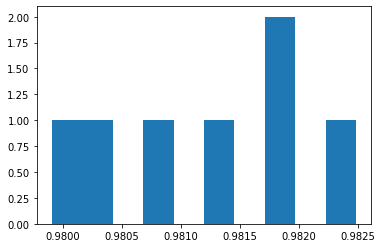

In [ ]:
plt.hist(results)

## Training the model

In [ ]:
model = DecisionTreeClassifier(max_depth=20)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Making predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions
len(predictions)
# cross verifying to see if all values are there

array([1, 3, 2, ..., 2, 2, 3])

63895

## Generating the hackathon file 

In [ ]:
sample = pd.read_csv('Hackathon_Sample Solution.csv')

In [ ]:
sample.head()
sample.shape

,ID,Class
0,9240,1
1,209951,1
2,29879,1
3,177914,1
4,180406,1


(63895, 2)

In [ ]:
pred_df = pd.Series(predictions)
sol = pd.concat([sample.ID, pred_df], axis=1) 
sol.head()

,ID,0
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


In [ ]:
sol.rename(columns = {0 : 'Class'}, inplace=True)
sol.head()

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


In [ ]:
sol.to_csv('sol.csv')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Cross Validation

In [ ]:
num_folds = 7
#seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = RandomForestClassifier(max_depth=20)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.97995211 0.98018593 0.98225185 0.98074937 0.98319091 0.98004507
 0.98201709]
Accuracy: 98.120% (0.119%)


(array([3., 0., 1., 0., 0., 0., 1., 1., 0., 1.]),
 array([0.97995211, 0.98027599, 0.98059987, 0.98092375, 0.98124763,
        0.98157151, 0.98189539, 0.98221927, 0.98254315, 0.98286703,
        0.98319091]),
 <a list of 10 Patch objects>)

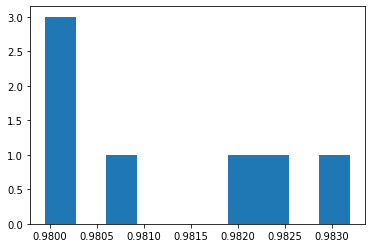

In [ ]:
plt.hist(results)

## Model Building and predictions

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(X_test)

## Generating the solutions file

In [ ]:
pred_df = pd.Series(predictions)
sol = pd.concat([sample.ID, pred_df], axis=1) 
sol.rename(columns = {0 : 'Class'}, inplace=True)
sol.head()

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


In [ ]:
sol.to_csv('sol.csv')

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

### Cross Validation

In [ ]:
num_folds = 7
#seed = 7

kfold = KFold(n_splits=num_folds)
model = BaggingClassifier(n_estimators=50)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.98722945 0.98628979 0.98666541 0.98624284 0.98741666 0.98666541
 0.98675932]
Accuracy: 98.675% (0.041%)


(array([2., 0., 0., 2., 1., 0., 0., 0., 1., 1.]),
 array([0.98624284, 0.98636022, 0.9864776 , 0.98659499, 0.98671237,
        0.98682975, 0.98694713, 0.98706451, 0.9871819 , 0.98729928,
        0.98741666]),
 <a list of 10 Patch objects>)

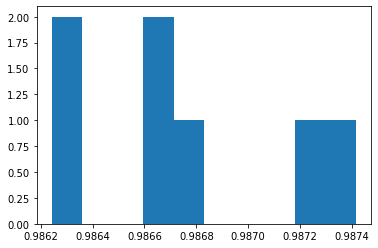

In [ ]:
plt.hist(results)

## Model building and prediction

In [ ]:
model = BaggingClassifier(n_estimators=50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

## Generating Solutions File

In [ ]:
pred_df = pd.Series(predictions)
sol = pd.concat([sample.ID, pred_df], axis=1) 
sol.rename(columns = {0 : 'Class'}, inplace=True)
sol.head()

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


In [ ]:
sol.to_csv('sol.csv')

# Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

## Cross Validation

In [ ]:
num_folds = 5
#seed = 7

kfold = KFold(n_splits=num_folds)
model = AdaBoostClassifier(n_estimators=50)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94114293 0.94292038 0.94093973 0.93235403 0.9314485 ]
Accuracy: 93.776% (0.484%)


(array([2., 0., 0., 0., 0., 0., 0., 0., 2., 1.]),
 array([0.9314485 , 0.93259569, 0.93374288, 0.93489007, 0.93603725,
        0.93718444, 0.93833163, 0.93947882, 0.94062601, 0.9417732 ,
        0.94292038]),
 <a list of 10 Patch objects>)

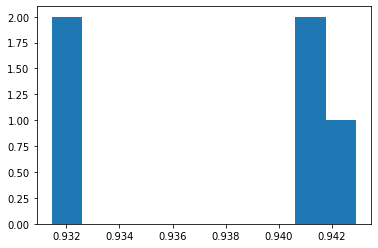

In [ ]:
plt.hist(results)

## Model building and predictions

In [ ]:
model = AdaBoostClassifier(n_estimators=70, learning_rate=0.1)   ##base_estimator=dt_model, 
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=70, random_state=None)

In [ ]:
predictions = model.predict(X_test)

## Generating the solutions file

In [ ]:
pred_df = pd.Series(predictions)
sol = pd.concat([sample.ID, pred_df], axis=1) 
sol.rename(columns = {0 : 'Class'}, inplace=True)
sol.head()

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


In [ ]:
sol.to_csv('sol.csv')

# Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

## Cross Validation

In [ ]:
num_folds = 5
#seed = 7

kfold = KFold(n_splits=num_folds)
model = AdaBoostClassifier(n_estimators=50)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94114293 0.94292038 0.94093973 0.93235403 0.9314485 ]
Accuracy: 93.776% (0.484%)


(array([2., 0., 0., 0., 0., 0., 0., 0., 2., 1.]),
 array([0.9314485 , 0.93259569, 0.93374288, 0.93489007, 0.93603725,
        0.93718444, 0.93833163, 0.93947882, 0.94062601, 0.9417732 ,
        0.94292038]),
 <a list of 10 Patch objects>)

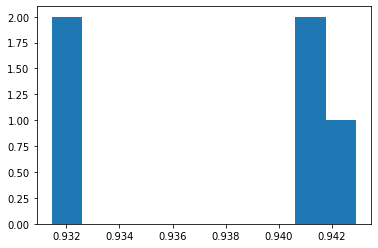

In [ ]:
plt.hist(results)

## Model building

In [ ]:
model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=20)
model = model.fit(X_train, y_train)

## Predictions and generating the Solutions file

In [ ]:
predictions = model.predict(X_test)
pred_df = pd.Series(predictions)
sol = pd.concat([sample.ID, pred_df], axis=1) 
sol.rename(columns = {0 : 'Class'}, inplace=True)
sol.head()
sol.to_csv('sol.csv')

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier, plot_importance

## Cross Validation

In [ ]:
num_folds = 5
#seed = 7

kfold = KFold(n_splits=num_folds)
model = XGBClassifier(n_estimators=50, max_depth=20)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.98785968 0.98785968 0.98735621 0.98856357 0.98829527]
Accuracy: 98.799% (0.041%)


(array([1., 0., 0., 0., 2., 0., 0., 1., 0., 1.]),
 array([0.98735621, 0.98747694, 0.98759768, 0.98771842, 0.98783915,
        0.98795989, 0.98808063, 0.98820136, 0.9883221 , 0.98844283,
        0.98856357]),
 <a list of 10 Patch objects>)

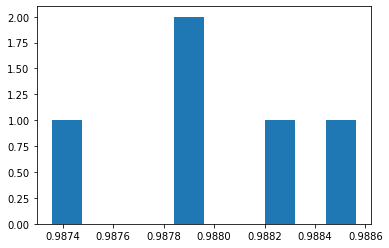

In [ ]:
plt.hist(results)

## Model building and prediction

In [ ]:
model = XGBClassifier(n_estimators=50, max_depth=20)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Generating the solutions file

In [ ]:
pred_df = pd.Series(predictions)
sol = pd.concat([sample.ID, pred_df], axis=1) 
sol.rename(columns = {0 : 'Class'}, inplace=True)
sol.head()
sol.to_csv('sol.csv')

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


# Conclusion

Out of all the classifiers tested in Iteration I and II, XGBoost turned out to be well performing one. It gave the winning accuracies of 98.81% and 98.83%

# Future Enhancements

Fixing existing quality issues  
Clustering  
Hyper parameter tuning  

# Thank You!